In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pl
import scipy as sp
import random
import matplotlib
import time
import fct_setup as setup
import fct_general as fct  

setup.SetPlotParams()

c_fullrank_light = 'darkgrey'
c_fullrank_dark = 'dimgrey'
c_lowrank_light = '#E2AF8A'
c_lowrank_dark = '#B0733D'

## Eigenspectra diagrams

In [45]:
"""
Define eigenvalues
"""

N = 300       # number of units
s = 0.5       # sparsity
g = 1         # full-rank connection strength
sigma = 4     # rank-one connection strength
rho = 1.2     # rank-one overlap 

# sparsifying matrix
chi = 1 - np.random.binomial(1, s, (N, N))  

# construct connectivity vectors
m, n = fct.make_connectivity_vectors(N, sigma, rho)

# construct connectivity matrices
J = np.random.normal(size=(N, N)) * np.sqrt(g**2/N)   # Gaussian fully-connected matrix 
P = np.outer(m, n) / N                                # Rank-one fully-connected matrix
J_tilde = J * chi                                     # Gaussian sparse matrix
P_tilde = P * chi                                     # Rank-one sparse matrix

# get eigenvalues
eigvals =[]
for matrix in [J, J_tilde, P, P_tilde]:
    eigvals.append(sp.linalg.eigvals(matrix, check_finite=False))


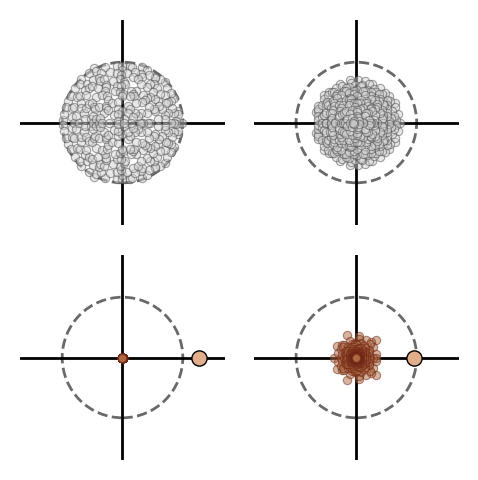

In [46]:
"""
Plot eigenvalues
"""

fig, axes = plt.subplots(2, 2, figsize=(2.5, 2.5), dpi=200)
axes = axes.flatten()

lim = 1.7
point_size = 9
point_opacity = 0.5

for ind, ax in enumerate(axes):
    ax.grid('on', alpha=0.4)
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal', 'box')
    fct.remove_ticks_and_labels(ax)
    plt.setp(ax, xlim=(-lim, lim), ylim=(-lim, lim))
    
    # add unit circle
    unit_circle = plt.Circle((0, 0), 1, color='dimgray', fill=False, ls='--', lw=1, zorder=2)
    ax.add_patch(unit_circle)
    
#     add axis labels
    # ax.set_ylabel(r'$Im(\lambda)$')
    # ax.set_xlabel(r'$Re(\lambda)$')
    
    # set axis limits 
    plt.setp(ax, xlim=(-lim, lim), ylim=(-lim, lim))
    
# plot eigenvalues
colors = ['lightgrey']*2 + ['#AD6B43']*2
edgecolors = ['#4B4B4B']*2 + ['#6D2213']*2
for i in range(4):
    axes[i].scatter(eigvals[i].real, eigvals[i].imag, fc=colors[i], ec=edgecolors[i], lw=0.4, s=point_size, alpha=point_opacity, zorder=3, clip_on=False)

# highlight structural eigenvalue
axes[2].scatter(eigvals[2][0].real, eigvals[2][0].imag, ec='black', fc=c_lowrank_light, s=30, alpha=1, zorder=3)
axes[3].scatter(eigvals[3][0].real, eigvals[3][0].imag, ec='black', fc=c_lowrank_light, s=30, alpha=1, zorder=3)

fig.tight_layout(pad=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()


### Gaussian - fixed fraction of connections $s$

In [22]:
"""
General parameters
"""

g = 1        # full-rank connection strength
N = 2000     # number of units

In [23]:
"""
Radius as function of sparsity
"""

J = np.random.normal(size=(N, N)) * np.sqrt(g**2/N)   # Gaussian fully-connected matrix 

sparsities = np.linspace(0, 1, 12)  # make finer scale
sparsities_fine = np.linspace(0, 1, 100) 
r_theoretical = g * np.sqrt(1-sparsities_fine)

repeats = 2

r_data_avg = []
for s in sparsities:
    
    r_data = []

    for r in range(repeats):

        J_tilde = fct.sparsify(J, N, s)
        eigvals_J_tilde = sp.linalg.eigvals(J_tilde)
        r_data.append(max(np.abs(eigvals_J_tilde)))     # Extract maximum eigenvalue 

    r_data_avg.append(np.mean(r_data))
    

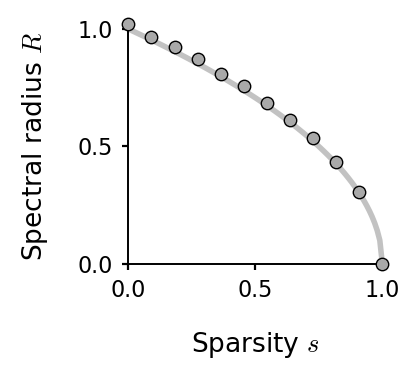

In [27]:
fig, ax = plt.subplots(figsize=(2.2, 2), dpi=200)
ax.plot(sparsities_fine, r_theoretical, c=c_fullrank_light, label='Theory', lw=2, alpha=0.7, clip_on=False)
ax.scatter(sparsities, r_data_avg, fc=c_fullrank_light, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)
ax.set_xlabel(r'Sparsity $s$')
ax.set_ylabel(r'Spectral radius $R$')

plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)

ax.set_xlim(0, 1)
ax.set_ylim(0, g*1)

sns.despine(top=True, right=True, left=False, bottom=False)
# ax.legend(loc='center left', frameon=False, bbox_to_anchor=(1, 0.5))
fig.tight_layout(pad=2)
plt.show()

### Gaussian - fixed number of connections $C$

In [31]:
"""
General parameters
"""

g = 1        # full-rank connection strength
C = 200      # number of connections

In [34]:
"""
Radius as function of sparsity
"""

sparsities = np.linspace(0, 1, 12)
Ns = (C / (1 - sparsities)).astype(int)
Ns[-1] = C

r_data_avg = []
sparsities_fine = np.linspace(0, 1, 100)      
Ns_fine = (C / (1 - sparsities_fine)).astype(int)
r_theoretical = g * np.sqrt(C/Ns_fine)

repeats = 10

for N in Ns:
    
    r_data = []
    
    for r in range(repeats):    

        J = np.random.normal(size=(N, N)) * np.sqrt(g**2/N)   # Gaussian fully-connected matrix 
        J_tilde = fct.sparsify_columns(J, N, C)

        eigvals_J_tilde = sp.linalg.eigvals(J_tilde)
        variance_J_tilde = np.var(J_tilde) 

        r_data.append(max(np.abs(eigvals_J_tilde)))
    
    r_data_avg.append(np.mean(r_data))


<ipython-input-34-f61c301c25de>:6: RuntimeWarning: divide by zero encountered in true_divide
  Ns = (C / (1 - sparsities)).astype(int)
<ipython-input-34-f61c301c25de>:13: RuntimeWarning: divide by zero encountered in true_divide
  Ns_fine = (C / (1 - sparsities_fine)).astype(int)
<ipython-input-34-f61c301c25de>:14: RuntimeWarning: invalid value encountered in sqrt
  r_theoretical = g * np.sqrt(C/Ns_fine)


In [35]:
# sort out final datapoint
r_theoretical[-1] = 0

<ipython-input-36-b325057ca6d7>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['C', '2C', r'$\rightarrow \infty$'])


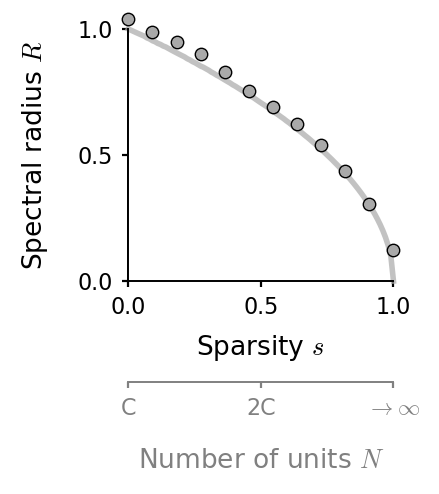

In [36]:
fig, ax = plt.subplots(figsize=(2.3, 2.5), dpi=200)

ax.plot(sparsities_fine, r_theoretical, c=c_fullrank_light, label='Theory', lw=2, alpha=0.7, clip_on=False)
ax.scatter(sparsities, r_data_avg, fc=c_fullrank_light, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)

ax.set_xlabel(r'Sparsity $s$',  labelpad=5)
ax.set_ylabel(r'Spectral radius $R$',  labelpad=10)
ax.set_xlim(0, 1)
ax.set_ylim(0, g*1)
plt.locator_params(axis='x', nbins=3)

# plot second x axis showing number of neurons
ax2 = ax.twiny()
ax2.set_xlabel(r'Number of units $N$')
ax2.set_xlim(0, 1)
ax2.set_xticklabels(['C', '2C', r'$\rightarrow \infty$']) 
ax2.set_xticks([0, 0.5, 1])
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.4))

# change color of second x axis
color='grey'
ax2.spines['bottom'].set_color(color)
ax2.tick_params(axis='x', colors=color)
ax2.tick_params(axis='y', colors=color)
ax2.yaxis.label.set_color(color)
ax2.xaxis.label.set_color(color)

ax.set_zorder(ax2.get_zorder()+1)
plt.locator_params(axis='y', nbins=3)

sns.despine(top=True, right=True, left=False, bottom=False)
# ax.legend(loc='center left', frameon=False, bbox_to_anchor=(1, 0.5))
fig.tight_layout()



In [37]:
"""
Radius as function of number of units
"""

Ns = np.linspace(C, 10*C, 12).astype('int')   
Ns[-1] = 10 * C  
sparsities = 1-C/Ns

r_data_avg = []
r_data_variance_avg = []

sparsities_fine = np.linspace(0, 1, 100)      
Ns_fine = (C / (1 - sparsities_fine)).astype(int)
r_theoretical = g * np.sqrt(C/Ns_fine)

repeats = 2

for N in Ns:
    
    for r in range(repeats):
        r_data = []
        r_data_variance = []
    
        J = np.random.normal(size=(N, N)) * np.sqrt(g**2/N)   # Gaussian fully-connected matrix 

        chi = np.zeros((N, N))
        for i in range(N):
            indices = random.sample(range(N), C)  # select C connections per column
            chi[indices, i] = 1

        J_tilde = J * chi 

        eigvals_J_tilde = sp.linalg.eigvals(J_tilde)
        variance_J_tilde = np.var(J_tilde) 

        r_data.append(max(np.abs(eigvals_J_tilde)))
        r_data_variance.append(np.sqrt(variance_J_tilde * N))

    r_data_avg.append(np.mean(r_data))


        

<ipython-input-37-4d6cc8c73dc0>:14: RuntimeWarning: divide by zero encountered in true_divide
  Ns_fine = (C / (1 - sparsities_fine)).astype(int)
<ipython-input-37-4d6cc8c73dc0>:15: RuntimeWarning: invalid value encountered in sqrt
  r_theoretical = g * np.sqrt(C/Ns_fine)


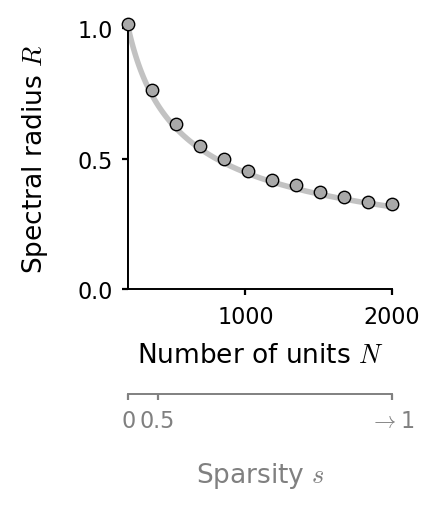

In [38]:
fig, ax = plt.subplots(figsize=(2.3, 2.5), dpi=200)

ax.plot(Ns_fine, r_theoretical, c=c_fullrank_light, label='Theory', lw=2, alpha=0.7)
ax.scatter(Ns, r_data_avg, fc=c_fullrank_light, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)


plt.locator_params(axis='x', nbins=3)
ax.set_xlabel(r'Number of units $N$', labelpad=5)
ax.set_ylabel(r'Spectral radius $R$', labelpad=10 )
ax.set_xlim(C, Ns[-1])
ax.set_ylim(0, g*1)

# plot second x axis showing sparsity
ax2 = ax.twiny()
ax2.set_xlabel(r'Sparsity $s$')
ax2.set_xlim(C, Ns[-1])
ax2.set_xticks((C / (1 - np.array([0, 0.5, 0.9]))))
ax2.set_xticklabels(['0', '0.5', r'$\rightarrow$1'])                     
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.4))

# change color of second x axis
color='grey'
ax2.spines['bottom'].set_color(color)
ax2.tick_params(axis='x', colors=color)
ax2.tick_params(axis='y', colors=color)
ax2.yaxis.label.set_color(color)
ax2.xaxis.label.set_color(color)
ax.set_zorder(ax2.get_zorder()+1)

plt.locator_params(axis='y', nbins=3)

sns.despine(top=True, right=True, left=False, bottom=False)
# ax.legend(loc='center left', frameon=False, bbox_to_anchor=(1, 0.5))
fig.tight_layout()